In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

In [22]:
n_samples = 10000          # total number of samples to generate
n_features = 12            # total number of features (columns)
n_informative = 6          # number of informative features (useful for class separation)
n_redundant = 2            # number of redundant (linear combinations of informative)
n_repeated = 0             # number of duplicated features (rarely needed)
n_classes = 2              # number of distinct classes (binary classification)
weights = [0.90, 0.10]     # class distribution: 90% class 0 (majority), 10% class 1 (minority)
flip_y = 0.01              # fraction of labels to randomly flip (introduces label noise)
class_sep = 1.0            # controls separability between classes (higher -> easier)
random_state = 42          # seed to make generation deterministic / reproducible

# Generate synthetic imbalanced dataset
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=5,
    n_redundant=2,
    n_clusters_per_class=1,
    weights=weights,
    flip_y=0,
    random_state=42
)

# Convert to pandas DataFrame for convenience
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
df['target'] = y

print(df['target'].value_counts())
# print(df['target'].value_counts(normalize=True))
# df.head()

target
0    9700
1     300
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt

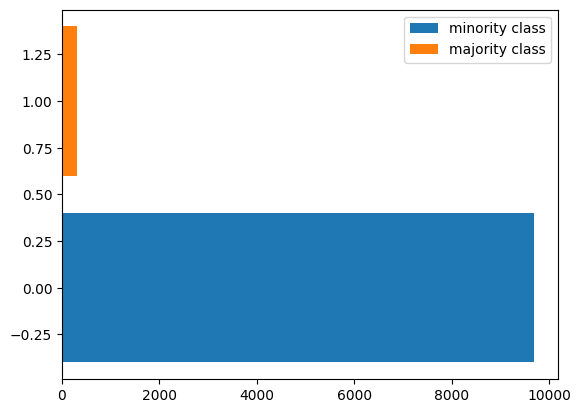

In [34]:
plt.barh(0, df['target'].value_counts()[0], label='minority class')
plt.barh(1, df['target'].value_counts()[1], label='majority class')
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
print(pd.Series(y_train).value_counts())

0    7760
1     240
Name: count, dtype: int64


In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
rus = RandomUnderSampler()
rus_X_train, rus_y_train = rus.fit_resample(X_train, y_train)
under_df = pd.DataFrame(rus_X_train, columns=[f'feature_{i}' for i in range(n_features)])
under_df['target'] = rus_y_train

print(under_df['target'].value_counts())

target
0    240
1    240
Name: count, dtype: int64


In [41]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
ros = RandomOverSampler()
ros_X_train, ros_y_train = ros.fit_resample(X_train, y_train)
over_df = pd.DataFrame(ros_X_train, columns=[f'feature_{i}' for i in range(n_features)])
over_df['target'] = ros_y_train

print(over_df['target'].value_counts())

target
0    7760
1    7760
Name: count, dtype: int64


In [43]:
from imblearn.over_sampling import SMOTE

In [46]:
smote = SMOTE(random_state=42)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)
smote_df = pd.DataFrame(smote_X_train, columns=[f'feature_{i}' for i in range(n_features)])
smote_df['target'] = smote_y_train

print(smote_df['target'].value_counts())

target
0    7760
1    7760
Name: count, dtype: int64


In [47]:
from imblearn.over_sampling import BorderlineSMOTE

In [53]:
borderline_smote = BorderlineSMOTE(
    kind='borderline-1',   # or 'borderline-2'
    random_state=42
)
border1_smote_X_train, border1_smote_y_train = borderline_smote.fit_resample(X_train, y_train)

border1_smote_df = pd.DataFrame(border1_smote_X_train, columns=[f'feature_{i}' for i in range(n_features)])
border1_smote_df['target'] = border1_smote_y_train

print(border1_smote_df['target'].value_counts())

target
0    7760
1    7760
Name: count, dtype: int64


In [52]:
borderline_smote = BorderlineSMOTE(
    kind='borderline-2',   # or 'borderline-2'
    random_state=42
)
border2_smote_X_train, border2_smote_y_train = borderline_smote.fit_resample(X_train, y_train)

border2_smote_df = pd.DataFrame(border2_smote_X_train, columns=[f'feature_{i}' for i in range(n_features)])
border2_smote_df['target'] = border2_smote_y_train

print(border2_smote_df['target'].value_counts())

target
0    7760
1    7760
Name: count, dtype: int64


In [50]:
from imblearn.over_sampling import ADASYN

In [54]:
adasyn = ADASYN(
    n_neighbors=5,
    random_state=42
)
adasyn_X_train, adasyn_y_train = adasyn.fit_resample(X_train, y_train)

adasyn_df = pd.DataFrame(adasyn_X_train, columns=[f'feature_{i}' for i in range(n_features)])
adasyn_df['target'] = adasyn_y_train

print(adasyn_df['target'].value_counts())

target
0    7760
1    7752
Name: count, dtype: int64


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

pipeline_hybrid = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),  # reduce majority to 2× minority
    ('smote', SMOTE(sampling_strategy=1.0, random_state=42))                 # balance minority to match majority
])

X_train_hybrid, y_train_hybrid = pipeline_hybrid.fit_resample(X_train, y_train)
print(y_train_hybrid.value_counts())